In [1]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_path = "../数据/future_price.csv"
df = pd.read_csv(data_path)
df['date'] = pd.to_datetime(df['date'])
df.name.unique()

array(['螺纹钢', '线材', '沪铜', '沪铝', '橡胶', '燃油', '沪锌', '黄金', '白银', '沥青',
       '热轧卷板', '沪镍', '沪铅', '原油', '沪锡', '纸浆', '豆一', '豆二', '玉米', '玉米淀粉',
       '乙二醇', '纤维板', '铁矿石', '焦炭', '鸡蛋', '焦煤', '塑料', '豆粕', '棕榈', 'PP',
       'PVC', '豆油', '鲜苹果', '棉花', '红枣', '棉纱', '玻璃', '粳稻', '晚籼稻', '郑醇',
       '菜油', '早籼稻', '菜粕', '菜籽', '硅铁', '锰硅', '白糖', 'PTA', '强麦', '动力煤'],
      dtype=object)

In [3]:
df = df[df.name=='螺纹钢']
df = df.set_index('date')
df.head()

,open,high,low,close,volume,code,name
date,,,,,,,
2009-03-27,3550.0,3663.0,3513.0,3561.0,354590,RB0,螺纹钢
2009-03-30,3550.0,3580.0,3528.0,3544.0,145168,RB0,螺纹钢
2009-03-31,3538.0,3566.0,3531.0,3549.0,70592,RB0,螺纹钢
2009-04-01,3560.0,3561.0,3543.0,3547.0,28100,RB0,螺纹钢
2009-04-02,3545.0,3548.0,3456.0,3473.0,235446,RB0,螺纹钢


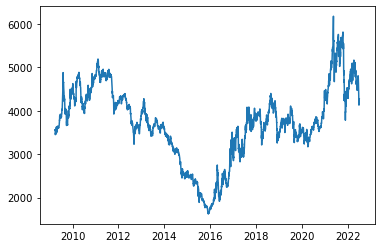

In [4]:
plt.plot(df['close'])

# SAR

In [6]:
talib.SAR(d['high'], d['low'], 0.02, 0.2)

date
2022-01-04            NaN
2022-01-05    4291.000000
2022-01-06    4294.160000
2022-01-07    4302.593600
2022-01-10    4316.237984
                 ...     
2022-06-21    4694.056058
2022-06-22    4632.050452
2022-06-23    4576.245407
2022-06-24    4526.020866
2022-06-27    4480.818780
Length: 115, dtype: float64

In [7]:
d

,open,high,low,close,volume,code,name
date,,,,,,,
2022-01-04,4302.0,4398.0,4291.0,4395.0,1184617,RB0,螺纹钢
2022-01-05,4400.0,4449.0,4385.0,4444.0,1277992,RB0,螺纹钢
2022-01-06,4452.0,4505.0,4430.0,4494.0,1422849,RB0,螺纹钢
2022-01-07,4495.0,4530.0,4455.0,4526.0,1285819,RB0,螺纹钢
2022-01-10,4525.0,4537.0,4463.0,4492.0,1133370,RB0,螺纹钢
...,...,...,...,...,...,...,...
2022-06-21,4145.0,4256.0,4103.0,4224.0,2444922,RB0,螺纹钢
2022-06-22,4226.0,4261.0,4092.0,4128.0,2226834,RB0,螺纹钢
2022-06-23,4147.0,4249.0,4115.0,4235.0,2354370,RB0,螺纹钢


# SAR

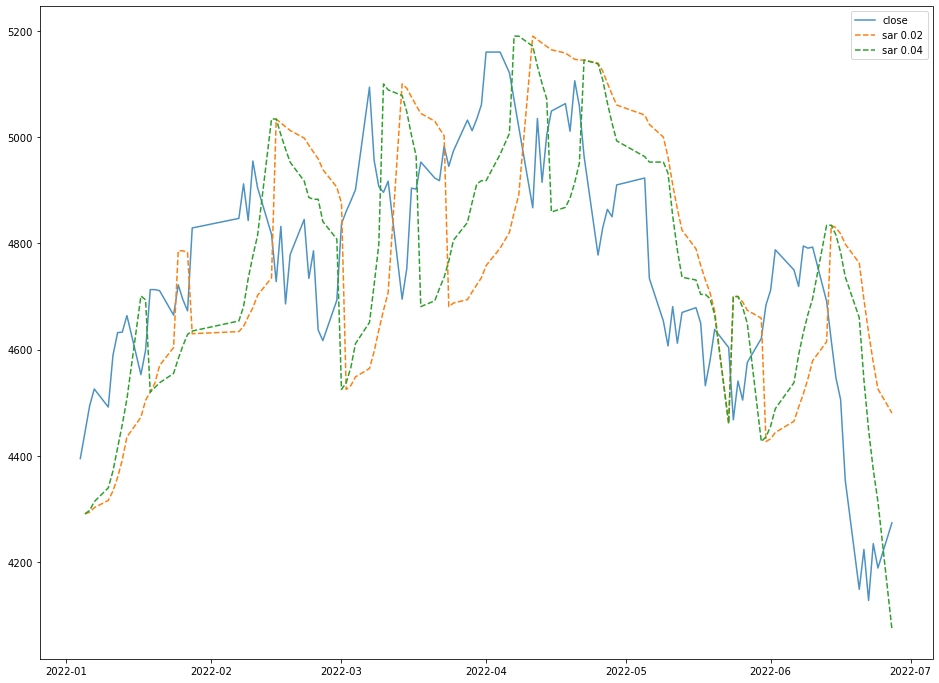

In [5]:
# SAR(high, low, acceleration=0, maximum=0)

d = df.loc['2022': ]
sar = talib.SAR(d['high'], d['low'], 0.02, 0.2)

_ = plt.subplots(figsize=(16, 12))
plt.plot(d['close'], label='close', alpha=0.8)
# plt.plot(d['high'], label='high', alpha=0.8)
# plt.plot(d['low'], label='low', alpha=0.8)
plt.plot(talib.SAR(d['high'], d['low'], 0.02, 0.2), label='sar 0.02', linestyle="--")
plt.plot(talib.SAR(d['high'], d['low'], 0.04, 0.2), label='sar 0.04', linestyle="--")

plt.legend()

# 动向指标

- ADX的读数越大，趋势越明显。衡量趋势强度时，需要比较几天的ADX 读数，观察ADX究竟是上升或下降。ADX读数上升，代表趋势转强；如果ADX读数下降，意味着趋势转弱。
- 当ADX曲线向上攀升，趋势越来越强，应该会持续发展。如果ADX曲线下滑，代表趋势开始转弱，反转的可能性增加。
- 单就ADX本身来说，由于指标落后价格走势，所以算不上是很好的指标，不适合单就ADX进行操作。可是，如果与其他指标配合运用，ADX可以确认市场是否存在趋势，并衡量趋势的强度。

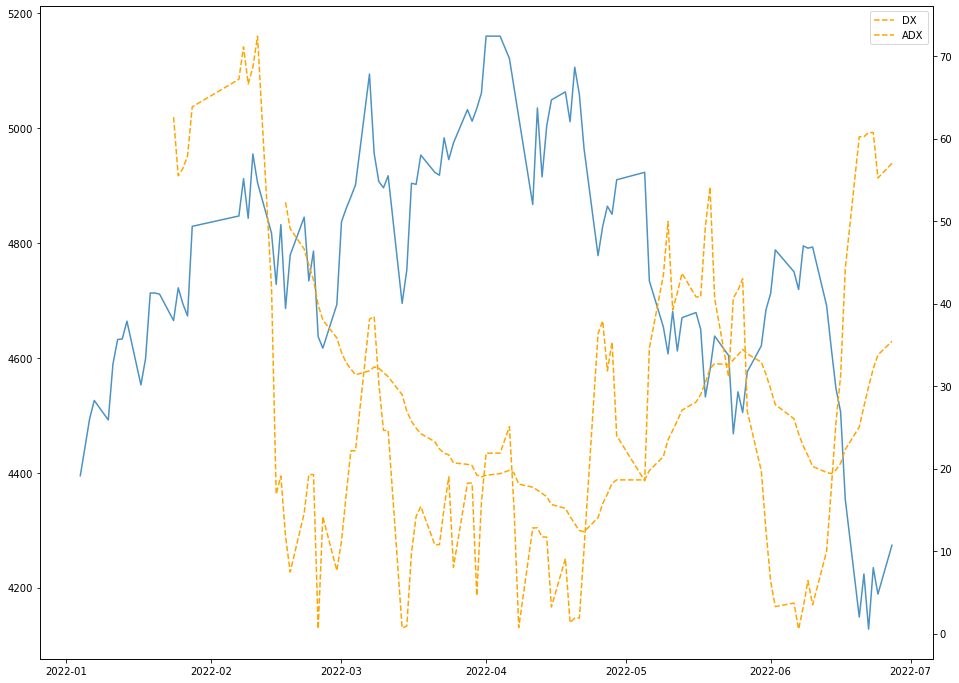

In [12]:
#  DX(high, low, close, timeperiod=14)

d = df.loc['2022': ]

_, ax = plt.subplots(figsize=(16, 12))
ax.plot(d['close'], label='close', alpha=0.8)

ax2 = ax.twinx()
ax2.plot(talib.DX(d['high'], d['low'], d['close'],  timeperiod=14), color='orange', label='DX', linestyle="--")
ax2.plot(talib.ADX(d['high'], d['low'], d['close'],  timeperiod=14), color='orange', label='ADX', linestyle="--")

ax2.legend()